In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_excel("prices.xlsx")
df

,area,prices
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


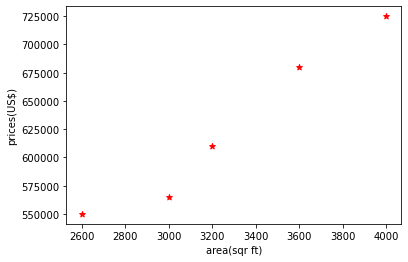

In [4]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("prices(US$)")
plt.scatter(df.area, df.prices, color="red", marker="*")

In [5]:
#linear regresyonu yapacak olan objeyi yazıyoruz:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.prices)

LinearRegression()

In [6]:
#Önceki hücre ile linear tahmin yapmayı sağladık.
reg.predict([[3300]])

array([628715.75342466])

In [7]:
#price = m * area + b (basic of linear regression)
#m:slope and b:y-axis intercept

In [8]:
#let's find the slope(m) of the regression
reg.coef_

array([135.78767123])

In [9]:
#Let's find the y-axis ntercep(b) of the regression
reg.intercept_

180616.43835616432

In [10]:
#area adında oluşturduğun excel dosyasındaki veriler için fiyat tahminleri elde etmek için:
d = pd.read_excel('areas.xlsx')
#d veritabanındaki baştan üç veriyi(0,1,2) almak için:
d.head(3)

,area
0,1000
1,1500
2,2300


In [11]:
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460


In [12]:
reg.predict(d)

array([316404.10958904, 384297.94520548, 492928.08219178, 661304.79452055,
       740061.64383562, 799808.21917808, 926090.75342466, 650441.78082192])

In [13]:
#yapılan tahminleri yeni bir sûtun olarak veritabınına ekleyebiliriz:
p = reg.predict(d)
d["prices"] = p

In [14]:
d

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836
5,4560,799808.219178
6,5490,926090.753425
7,3460,650441.780822


In [15]:
#Oluşan bu veritabanını da ayrı bir dosyaya aktarabiliriz:
d.to_excel("predictions.xlsx")

In [16]:
#Yeni veritabanındaki index noları silmek için:
d.to_excel("predictions.xlsx", index=False)

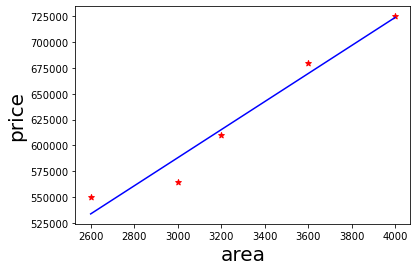

In [18]:
%matplotlib inline
plt.xlabel("area", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.scatter(df.area, df.prices, color="red", marker="*")
plt.plot(df.area, reg.predict(df[["area"]]), color="blue")